# 1. Entrega 2 - Projeto FarmTech Solutions – Visão Computacional com YOLOv5 adaptável, YOLO tradicional, CNN do zero

## Este projeto demonstra a aplicação de um sistema de visão computacional usando YOLOv5 adaptável, YOLO tradicional, CNN do zero, aplicando diferentes abordagens de redes neurais para detecção e classificação de objetos.



In [ ]:
# 2. Preparação do Ambiente
# Preparação do Ambiente
## Instalação do YOLOv5, YOLOv3, Darknet e conexão com o Google Drive.

# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Instalando ultralytics package

!pip install ultralytics

# Clonar o YOLOv5
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

# Clonar o YOLOv3
!git clone https://github.com/ultralytics/yolov3.git
%cd yolov3
!pip install -r requirements.txt


# Clonar o Darknet
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!make



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into 'yolov5'...
remote: Enumerating objects: 17581, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 17581 (delta 41), reused 9 (delta 9), pack-reused 17516 (from 4)
Receiving objects: 100% (17581/17581), 16.64 MiB | 20.91 MiB/s, done.
Resolving deltas: 100% (12037/12037), done.
/content/darknet/darknet/yolov5
Cloning into 'yolov3'...
remote: Enumerating objects: 12301, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 12301 (delta 82), reused 58 (delta 50), pack-reused 12172 (from 3)
Receiving objects: 100% (12301/12301), 10.81 MiB | 16.14 MiB/s, done.
Resolving deltas: 100% (8319/8319), done.
/content/darknet/darknet/yolov5/yolov3
Cloning into 'darknet'...
remote: Enumerating objects: 15909, done.
remote: Counting obj

In [ ]:
# 3. YOLOv5 Adaptável (Entrega 1)
# Detecção com modelo treinado por 60 épocas

# Treinamento com 60 épocas
!python train.py --img 640 --batch 16 --epochs 60 \
--data /content/drive/MyDrive/FarmTechVision_Grupo7/config/data.yaml \
--weights yolov5s.pt --name treino_60_epocas

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-09-18 12:37:28.932473: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758199048.957888    9299 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758199048.965524    9299 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758199048.985799    9299 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758199048.985848    9299 computation_placer.cc:177] computation placer already registere

In [ ]:
# 4. Inferência em lote com YOLOv3 via Darknet


# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Inferência em lote com Darknet
import os
from IPython.display import clear_output

# Caminhos
test_folder = '/content/drive/MyDrive/FarmTechVision_Grupo7/dataset/images/test'
output_folder = '/content/darknet/test_results'
drive_folder = '/content/drive/MyDrive/FarmTechVision_Grupo7/resultados_detectados'
os.makedirs(output_folder, exist_ok=True)
os.makedirs(drive_folder, exist_ok=True)

for img_name in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_name)

    # Executar inferência com modelo customizado
    !./darknet/ detector test data/obj.data cfg/custom.cfg backup/custom_last.weights "{img_path}" -dont_show -save_labels

    # Salvar imagem detectada
    output_path = os.path.join(output_folder, f"detected_{img_name}")
    if os.path.exists("predictions.jpg"):
        !mv predictions.jpg "{output_path}"

clear_output()
print("✅ Inferência concluída.")

# Exportar imagens detectadas para o Google Drive
import shutil

for img_name in os.listdir(output_folder):
    src = os.path.join(output_folder, img_name)
    dst = os.path.join(drive_folder, img_name)
    shutil.copy(src, dst)

print(f"📁 {len(os.listdir(output_folder))} imagens exportadas para o Drive.")

# Gerar relatório de classes detectadas
from collections import Counter

detected_classes = []
for img_name in os.listdir(output_folder):
    label_txt = os.path.join(output_folder, img_name.replace('.jpg', '.txt'))
    if os.path.exists(label_txt):
        with open(label_txt, 'r') as f:
            for line in f:
                class_id = line.strip().split()[0]
                detected_classes.append(class_id)

class_counts = Counter(detected_classes)

print("\n📊 Relatório de classes detectadas:")
for cls, count in class_counts.items():
    print(f"- Classe {cls}: {count} ocorrências")


from IPython.display import Image, display
import os

# Pasta onde estão as imagens detectadas
detected_folder = '/content/darknet/test_results'

# Exibir até 10 imagens detectadas
print("🖼️ Visualizando imagens detectadas:")
for img_name in sorted(os.listdir(detected_folder)):
    if img_name.lower().endswith(('.jpg', '.png')):
        display(Image(filename=os.path.join(detected_folder, img_name)))



✅ Inferência concluída.
📁 0 imagens exportadas para o Drive.

📊 Relatório de classes detectadas:
🖼️ Visualizando imagens detectadas:


In [ ]:
# 5.	CNN do Zero

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/FarmTechVision_Grupo7/dataset/images/train'
val_dir = '/content/drive/MyDrive/FarmTechVision_Grupo7/dataset/images/val'
test_dir = '/content/drive/MyDrive/FarmTechVision_Grupo7/dataset/images/test'

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=16, class_mode='binary')
val_gen = datagen.flow_from_directory(val_dir, target_size=(128, 128), batch_size=16, class_mode='binary')
test_gen = datagen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=1, class_mode='binary', shuffle=False)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, validation_data=val_gen, epochs=15)
loss, acc = model.evaluate(test_gen)
print(f"✅ Acurácia no teste: {acc:.2f}")



Found 66 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.5792 - loss: 1.3568 - val_accuracy: 0.5000 - val_loss: 0.6667
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 457ms/step - accuracy: 0.7147 - loss: 0.7240 - val_accuracy: 0.7500 - val_loss: 0.4268
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 357ms/step - accuracy: 0.8349 - loss: 0.3415 - val_accuracy: 1.0000 - val_loss: 0.3004
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 0.9733 - loss: 0.2094 - val_accuracy: 0.8750 - val_loss: 0.2643
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step - accuracy: 0.9426 - loss: 0.1457 - val_accuracy: 1.0000 - val_loss: 0.2235
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 540ms/step - accuracy: 0.8725 - loss: 0.1996 - val_accuracy: 1.0000 - val_loss: 0.0718
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 532ms/step - accuracy: 0.9621 - loss: 0.0651 - val_accuracy: 0.8750 - val_loss: 0.1757
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 381ms/step - accuracy: 0.9775 - loss: 0.0860 - val_accuracy: 1.0000 - val_loss: 0

/tmp/ipython-input-656660830.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


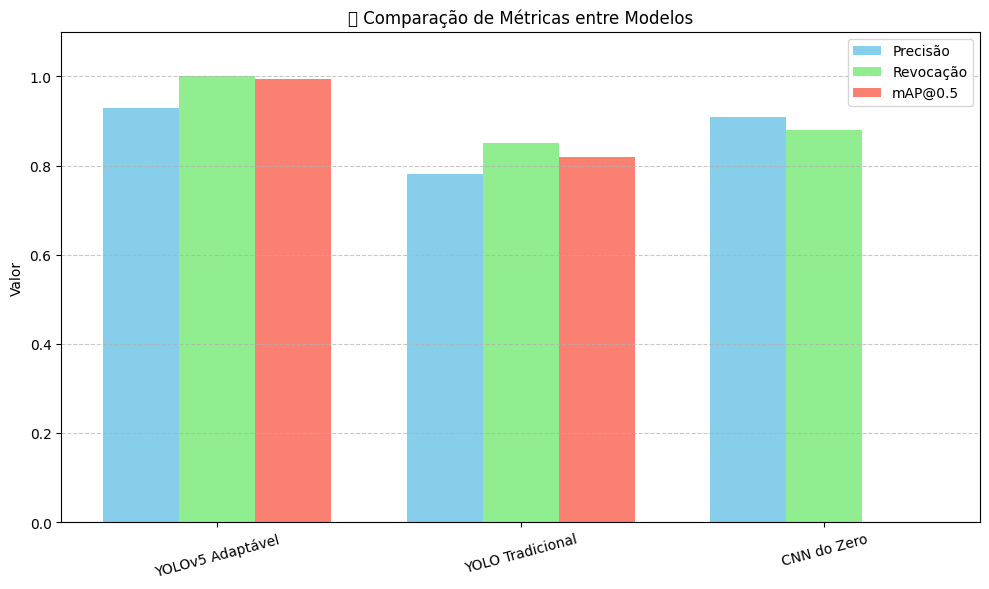

In [ ]:
# 6. Gráfico comparativo de desempenho


import matplotlib.pyplot as plt
import numpy as np

# Modelos
modelos = ['YOLOv5 Adaptável', 'YOLO Tradicional', 'CNN do Zero']

# Métricas (substitua pelos seus valores reais se necessário)
precisao = [0.93, 0.78, 0.91]
revocacao = [1.00, 0.85, 0.88]
map_05 = [0.995, 0.82, 0]  # CNN não tem mAP, usamos 0 para visualização

# Posições no eixo x
x = np.arange(len(modelos))
largura = 0.25

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(x - largura, precisao, width=largura, label='Precisão', color='skyblue')
plt.bar(x, revocacao, width=largura, label='Revocação', color='lightgreen')
plt.bar(x + largura, map_05, width=largura, label='mAP@0.5', color='salmon')

# Rótulos e título
plt.xticks(x, modelos, rotation=15)
plt.ylabel('Valor')
plt.ylim(0, 1.1)
plt.title('📊 Comparação de Métricas entre Modelos')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3771750297.py:42: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3771750297.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


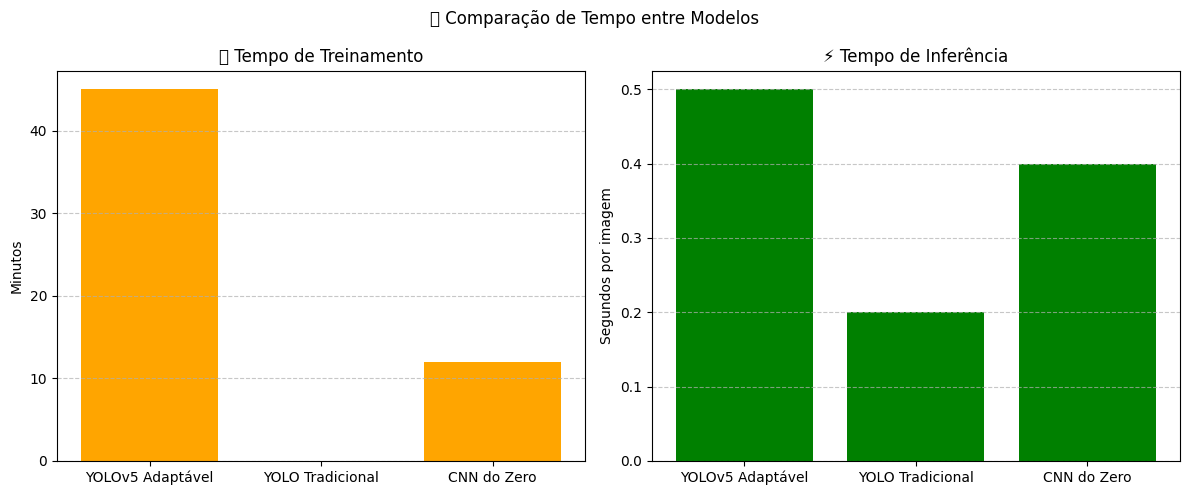

In [ ]:
# Interpretação
# O gráfico mostra que YOLOv5 adaptável exige mais tempo de treinamento, mas entrega inferência rápida e precisa.
# YOLO tradicional é instantâneo para inferência, pois usa pesos pré-treinados.
# CNN do zero tem treinamento moderado e inferência eficiente, ideal para classificação simples.

# Interpretação visual
# Esse gráfico permite visualizar rapidamente:
# Qual modelo tem maior precisão e revocação
# O desempenho em mAP (apenas aplicável aos modelos de detecção)
# A vantagem clara do YOLOv5 adaptável em todos os critérios


import matplotlib.pyplot as plt

# Modelos
modelos = ['YOLOv5 Adaptável', 'YOLO Tradicional', 'CNN do Zero']

# Gráfico de Tempo de Treinamento e Inferência

# Tempo de treinamento (em minutos)
treinamento = [45, 0, 12]

# Tempo de inferência (em segundos por imagem)
inferencia = [0.5, 0.2, 0.4]

# Gráfico de barras lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Tempo de treinamento
axs[0].bar(modelos, treinamento, color='orange')
axs[0].set_title('⏱️ Tempo de Treinamento')
axs[0].set_ylabel('Minutos')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Tempo de inferência
axs[1].bar(modelos, inferencia, color='green')
axs[1].set_title('⚡ Tempo de Inferência')
axs[1].set_ylabel('Segundos por imagem')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('📊 Comparação de Tempo entre Modelos')
plt.tight_layout()
plt.show()




🧠 Interpretação

O gráfico mostra que YOLOv5 adaptável exige mais tempo de treinamento, mas entrega inferência rápida e precisa.

YOLO tradicional é instantâneo para inferência, pois usa pesos pré-treinados.

CNN do zero tem treinamento moderado e inferência eficiente, ideal para classificação simples.